In [319]:
### GWAS enrichment analysis based on coloc results

# Libraries

In [320]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'"


[1] "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library"


In [321]:
library(gwasrapidd)

In [322]:
source('MS4_Plot_Config.r')

In [323]:
packageVersion("gwasrapidd")

[1] '0.99.17'

# Parameters

In [324]:
### Paths to the data: eqtl, co-eQTL mapping results

In [325]:
data_path = '../data/current/coeqtl_mapping/'

In [326]:
data_path_eqtl =  '../data/current/eqtl_mapping/'

In [327]:
coeqtl_results_path = 'co_qtls_decision_tree/'

In [328]:
result_path =  '../data/current//results/'

In [329]:
### Filtering decision

In [330]:
only_esnps =TRUE   # only use eQTL as backgrounds

In [331]:
remove_HLA = TRUE    # remove HLA genes from enrichment analysis

In [332]:
only_dt = TRUE ## only use decision tree genes in background and analysis

In [333]:
### Which set of significant co-eQTLs to load

In [334]:
### To this meta-dataset all the information should be joined

In [335]:
p_val_thres = ''  # '' in case of 0.05; numeric value otherwise

In [336]:
p_val_column = 'p_val_mt_eGene'  #p_val_mt_eGene; q_val

In [337]:
if(p_val_thres == ''){
sign_coeqtl_path = paste0(data_path, coeqtl_results_path,  "/shared_results/5DS_Meta_Analysis_Sign_coeQTLs133", p_val_column, "_.csv")
    }


In [338]:
file.info(sign_coeqtl_path )$ctime

[1] "2025-07-20 12:14:08 CEST"

In [339]:
### Define the threshold for colocalisation

In [340]:
coloc_thres =  'relation'   # meani

In [341]:
### Define which traits to filter on

In [342]:
use_gwas = 'disease' 
# Define GWAS subset: all_traits - no filtering; rm_cell_count = remove cell count features; disease = filter on disease specific features; immune = filter on immune specific features

In [343]:
### Define whether to exclude SNPs without CS

In [344]:
cs_snps = FALSE

In [345]:
add_snp_based  = FALSE   # Define whether to combine with SNP annotation from SNP based GWAS enrichment analysis

# Data 

## GWAS enrichment result SNP based

In [346]:
snp_enrichment = fread(paste0('../data/current/meta-data/gwas_enrichment_snp/', 'coeqtl_gwas_enrich_table_all_celltypes.tsv.gz'))

In [347]:
head(snp_enrichment,2)

V1,ALL,ALL_no_cell_count,ALL_disease,ALL_immune,B_all_traits,B_all_traits_no_cell_count,B_disease,B_immune,CD4_T_all_traits,⋯,CD8_T_disease,CD8_T_immune,Mono_all_traits,Mono_all_traits_no_cell_count,Mono_disease,Mono_immune,NK_all_traits,NK_all_traits_no_cell_count,NK_disease,NK_immune
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
p_value,2.407397e-08,2.338709e-08,0.01870063,0.0006640809,0.173391,0.1731173,0.1422117,0.006454817,2.724444e-06,⋯,0.04961523,0.003217347,0.1122192,0.1120808,0.8767768,0.2054784,0.02756775,0.02746182,0.4340997,0.01034244
estimate,2.026247e+00,2.029717e+00,1.53156342,2.7811929825,1.418182,1.4216715,1.5984694,3.626451613,2.131267e+00,⋯,1.63273427,3.173868313,1.4624373,1.4695271,1.0252781,1.8622449,1.63591721,1.63963964,1.2548924,2.98793103


In [348]:
### Transform  format

In [349]:
rownames(snp_enrichment) = snp_enrichment$V1

In [350]:
snp_enrichment = as.matrix(snp_enrichment)

In [351]:
snp_enrichment = t(snp_enrichment)

In [352]:
colnames(snp_enrichment) = snp_enrichment['V1',]

In [353]:
snp_enrichment <- snp_enrichment[-1, ]

In [354]:
snp_enrichment = data.frame(snp_enrichment)

In [355]:
snp_enrichment$cell_type = rownames(snp_enrichment)

In [356]:
snp_enrichment$type = str_replace(snp_enrichment$cell_type, 'ALL|CD4_T|CD8_T|Mono|B|NK', '')

In [357]:
snp_enrichment$cell_type[snp_enrichment$type != ''] = str_replace(snp_enrichment$cell_type[snp_enrichment$type != ''], snp_enrichment$type[snp_enrichment$type != ''], '')

In [358]:
snp_enrichment$type = str_replace(snp_enrichment$type, '_', '')

In [359]:
head(snp_enrichment,2)

,p_value,estimate,conf_upper,conf_lower,cell_type,type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ALL,2.407397e-08,2.026247e+00,2.617472e+00,1.569775e+00,ALL,
ALL_no_cell_count,2.338709e-08,2.029717e+00,2.621962e+00,1.572458e+00,ALL,no_cell_count


In [360]:
unique(snp_enrichment$type)

[1] ""                         "no_cell_count"           
[3] "disease"                  "immune"                  
[5] "all_traits"               "all_traits_no_cell_count"

In [361]:
### replace categories to match selection
snp_enrichment$type = str_replace(snp_enrichment$type, 'all_traits_no_cell_count', 'rm_cell_count')
snp_enrichment$type[snp_enrichment$type == 'no_cell_count'] = 'rm_cell_count'
snp_enrichment$type[snp_enrichment$type == ''] = 'all_traits'

In [362]:
unique(snp_enrichment$cell_type)

[1] "ALL"   "B"     "CD4_T" "CD8_T" "Mono"  "NK"

In [363]:
head(snp_enrichment,2)

,p_value,estimate,conf_upper,conf_lower,cell_type,type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ALL,2.407397e-08,2.026247e+00,2.617472e+00,1.569775e+00,ALL,all_traits
ALL_no_cell_count,2.338709e-08,2.029717e+00,2.621962e+00,1.572458e+00,ALL,rm_cell_count


In [364]:
snp_enrichment$p_value = as.numeric(snp_enrichment$p_value)
snp_enrichment$estimate = as.numeric(snp_enrichment$estimate)
snp_enrichment$conf_upper = as.numeric(snp_enrichment$conf_upper)
snp_enrichment$conf_lower = as.numeric(snp_enrichment$conf_lower)

## Information about genes passing Decision Tree Filter

In [365]:
cell_types = c( 'B', 'NK', 'Mono', 'CD8_T' , 'CD4_T')

In [366]:
gene_list = data.frame()

In [367]:
datasets_to_load = c('Franke_v2', 'Franke_v3', 'wijst', 'oneK1K', 'multiome')

In [368]:
for(j in datasets_to_load){
    for(i in cell_types){
        gene_list_input = fread(paste0(data_path, coeqtl_results_path , '/correlation_input/', 'F11_Decision_Tree_Geneswg3_',j,'_' , i, '.Qced.Normalized.SCs.Rds.tsv'), header = FALSE)
        gene_list_input$cell_type = i
        gene_list_input$dataset = j
        gene_list = rbind(gene_list, gene_list_input)
        }
    }

In [369]:
head(gene_list_input,2)

V1,cell_type,dataset
<chr>,<chr>,<chr>
A2M,CD4_T,multiome
A2M-AS1,CD4_T,multiome


In [370]:
### unique gene list per cell-type

In [371]:
 gene_list= unique( gene_list[,c('cell_type', 'V1')])

In [372]:
head( gene_list,2)

cell_type,V1
<chr>,<chr>
B,x
B,AC004687.1


In [373]:
colnames( gene_list) = c('cell_type', 'gene')

In [374]:
length(unique(gene_list$gene))

[1] 13680

## Load significant co-eQTLs (from meta-analysis)

In [375]:
sign_coeqtls =fread(paste0(sign_coeqtl_path))

In [376]:
nrow(sign_coeqtls)

[1] 91628

In [377]:
sign_coeqtls = as.data.frame(sign_coeqtls)

In [378]:
sign_coeqtls = sign_coeqtls[sign_coeqtls$type == 'unique',] ## only clearly identifiable eGenes

In [379]:
head(sign_coeqtls,2)

,V1,eGene,coeGene,snp_id,cell_type,feature_id,triplet,n_samples,p_value,z_score,⋯,eQTL_remap2022_1,eQTL_remap2022_2,eQTL_remap2022_3,eQTL_HPA,eQTL_MIRNA,eQTL_TF,coeGene_is_enriched_TF,cctqtl,simulation_score,ccInteraction
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<int>
1,1,A2M,BACH2,12:8971336:T:C,CD4_T,A2M_BACH2,12:8971336:T:C;A2M_BACH2,977,2.687871e-11,-6.662730,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0
2,2,A2M,BACH2,12:8992460:T:C,CD4_T,A2M_BACH2,12:8992460:T:C;A2M_BACH2,977,1.680350e-10,-6.388031,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0


In [380]:
length(unique(sign_coeqtls$eGene))

[1] 301

In [381]:
length(unique(sign_coeqtls$eGene[sign_coeqtls$cell_type == 'CD4_T']))

[1] 168

In [382]:
### Extract the position from the SNP-ID

In [383]:
sign_coeqtls$pos = str_extract(sign_coeqtls$snp_id, ':\\d.*\\d:')
sign_coeqtls$pos = str_replace_all(sign_coeqtls$pos, ':', '')
#sign_coeqtls$pos = str_replace(sign_coeqtls$pos, '.*:', '')

In [384]:
### Filter on only eSNPs (remove co-eQTLs caused by added GWAS SNPs)

In [385]:
only_esnps

[1] TRUE

In [386]:
if(only_esnps == TRUE){
    sign_coeqtls = sign_coeqtls[sign_coeqtls$eqtl_snp == 1,]
    }

In [387]:
nrow(sign_coeqtls)

[1] 19338

In [388]:
length(unique(sign_coeqtls$eGene))

[1] 280

In [389]:
length(unique(sign_coeqtls$eGene[sign_coeqtls$cell_type == 'CD4_T']))

[1] 157

In [390]:
### Filter: remove HLA- genes

In [391]:
remove_HLA

[1] TRUE

In [392]:
if(remove_HLA == TRUE){
    sign_coeqtls = sign_coeqtls[is.na(str_extract(sign_coeqtls$eGene, 'HLA')),]
    }

In [393]:
nrow(sign_coeqtls)

[1] 18663

In [394]:
length(unique(sign_coeqtls$eGene))

[1] 273

In [395]:
length(unique(sign_coeqtls$eGene[sign_coeqtls$cell_type == 'CD4_T']))

[1] 152

In [396]:
### Calculate amount of significant eGenes per cell-type (after filters)

In [397]:
coeqtl_egenes = sign_coeqtls %>% group_by(cell_type) %>% dplyr::summarise(amount_coeqtl_egenes  = length(unique(eGene)))

In [398]:
coeqtl_egenes

cell_type,amount_coeqtl_egenes
<chr>,<int>
B,32
CD4_T,152
CD8_T,76
Mono,50
NK,40


## sceQTLGen: eGene- SNP mapping

In [399]:
### Get all eQTLs and SNPs from sc-eQTL Gen that were tested in the co-eQTL mapping as backgroun

In [400]:
snp_gene_mapping_all = data.frame()

In [401]:
cell_types = c('B', 'CD4_T', 'CD8_T', 'NK', 'Mono')

In [402]:
for(i in cell_types){
    print(file.info(paste0(data_path_eqtl, 'sc_eqtlgen_final/'  , i, '_snp_egene_mapping.csv'))$ctime)
    snp_gene_mapping = read.csv(paste0(data_path_eqtl, 'sc_eqtlgen_final/'  , i, '_snp_egene_mapping.csv'))
    snp_gene_mapping$cell_type = i
    
    snp_gene_mapping_all = rbind(snp_gene_mapping, snp_gene_mapping_all)
    }
    

[1] "2025-02-12 14:31:31 CET"
[1] "2024-12-11 09:52:00 CET"
[1] "2024-12-11 09:51:32 CET"
[1] "2024-12-11 09:51:16 CET"
[1] "2025-02-12 14:30:19 CET"


In [403]:
snp_gene_mapping_all %>% group_by(cell_type) %>% summarise(amount_egenes = length(unique(feature_id)))

cell_type,amount_egenes
<chr>,<int>
B,2017
CD4_T,4988
CD8_T,2392
Mono,2029
NK,2170


In [404]:
head(snp_gene_mapping_all,2)

,X,feature_id,snp_id,feature_start,feature_end,p_value,beta,cell_type
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,CD52,1:26306290:C:T,26317957,26320523,1.903053e-214,-1.0420481,Mono
2,2,CD52,1:26358699:C:T,26317957,26320523,2.438329e-19,0.3022236,Mono


In [405]:
nrow(unique(snp_gene_mapping_all[, c('feature_id', 'snp_id')]))

[1] 14767

In [406]:
length(unique(snp_gene_mapping_all$snp_id))

[1] 13744

In [407]:
nrow(unique(snp_gene_mapping_all[,c('feature_id', 'snp_id')]))

[1] 14767

In [408]:
### Filter on only genes passing decision tree filter

In [409]:
head(gene_list,2)

cell_type,gene
<chr>,<chr>
B,x
B,AC004687.1


In [410]:
only_dt

[1] TRUE

In [411]:
if(only_dt == TRUE){
snp_gene_mapping_all = merge(snp_gene_mapping_all, gene_list, by.x = c('feature_id', 'cell_type'),
                             by.y = c('gene', 'cell_type'))
    }

In [412]:
length(unique(snp_gene_mapping_all$feature_id))

[1] 5309

In [413]:
nrow(unique(snp_gene_mapping_all[,c('feature_id', 'snp_id')]))

[1] 12199

In [414]:
### Filter out HLA

In [415]:
head(snp_gene_mapping_all,2)

,feature_id,cell_type,X,snp_id,feature_start,feature_end,p_value,beta
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,A1BG,B,1348,19:58406208:G:A,58345178,58353499,4.333125e-07,-0.1954896
2,A1BG,CD4_T,3178,19:58497199:G:A,58345178,58353499,2.302583e-13,-0.2558016


In [416]:
if(remove_HLA == TRUE){
snp_gene_mapping_all =  snp_gene_mapping_all[is.na(str_extract(snp_gene_mapping_all$feature_id, 'HLA')),]
    }

In [417]:
length(unique(snp_gene_mapping_all$feature_id))

[1] 5293

In [418]:
### OPT: filter on only eGenes with CS (only for testing)

In [419]:
cs_snps

[1] FALSE

In [420]:
### CS mapping indicating whether an eGene has a CS or not
cs_mapping = fread( paste0('/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/eqtl_mapping/sc_eqtlgen_final/Finemapping/', 'Top_CS_per_eGene.csv'), header = TRUE)

In [421]:
head(cs_mapping,2)

V1,feature_id,cell_type,SusieRss_CS
<int>,<chr>,<chr>,<dbl>
1,A1BG,B,-Inf
2,A1BG,CD4_T,3


In [422]:
unique(cs_mapping$SusieRss_CS)

[1] -Inf    3    1    4    2    5

In [423]:
if(cs_snps == TRUE){
    print(nrow(snp_gene_mapping_all))
    cs_mapping = cs_mapping[!is.infinite(cs_mapping$SusieRss_CS),]
    snp_gene_mapping_all = merge(snp_gene_mapping_all, cs_mapping, by = c('feature_id', 'cell_type'))
    print(nrow(snp_gene_mapping_all))
    }

In [424]:
### Get the amount of eGenes per cell-type 

In [425]:
egenes_cell_type = snp_gene_mapping_all %>% group_by(cell_type) %>% summarise(amount_egenes = length(unique(feature_id)))

In [426]:
egenes_cell_type

cell_type,amount_egenes
<chr>,<int>
B,1679
CD4_T,3676
CD8_T,2019
Mono,1748
NK,1914


In [427]:
### Get the amount of unique eGenes across all cell-types

In [428]:
egenes_amount = snp_gene_mapping_all  %>% summarise(amount_egenes = length(unique(feature_id)))

In [429]:
egenes_amount 

amount_egenes
<int>
5293


In [430]:
## Select alternative for doing across cell-type analysis (how to select an effect when it appears in multiple cell-types for the eGene)
alt = 'p_value' # ALTERNATIVES: minimum p-value (p_value); random (random)

In [431]:
head(snp_gene_mapping_all,2)

,feature_id,cell_type,X,snp_id,feature_start,feature_end,p_value,beta
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,A1BG,B,1348,19:58406208:G:A,58345178,58353499,4.333125e-07,-0.1954896
2,A1BG,CD4_T,3178,19:58497199:G:A,58345178,58353499,2.302583e-13,-0.2558016


In [432]:
if(alt == 'random'){
    set.seed(10)
    snp_gene_mapping_all_subset = unique(snp_gene_mapping_all[,c('feature_id', 'cell_type')]) %>% group_by(feature_id) %>% slice_sample(n = 1) 
    }

In [433]:
if(alt == 'p_value'){
    set.seed(1)
    snp_gene_mapping_all_subset = unique(snp_gene_mapping_all[,c('feature_id', 'cell_type', 'p_value')]) %>% group_by(feature_id) %>% dplyr::filter(p_value == min(p_value))  %>% slice_sample(n = 1) 
    }

In [434]:
nrow(snp_gene_mapping_all_subset)

[1] 5293

In [435]:
## Get the total amount of coeqtls across all cell-types

In [436]:
amount_coeqtls = length(unique(sign_coeqtls$eGene))

In [437]:
amount_coeqtls 

[1] 273

In [438]:
## For each eGene summarize in how many cell-types it is an eGene

In [439]:
cell_types_per_egene =  snp_gene_mapping_all %>% group_by(feature_id) %>% summarise(amount_cell_types = length(unique(cell_type)))

In [440]:
head(cell_types_per_egene  %>% arrange(-amount_cell_types),2)

feature_id,amount_cell_types
<chr>,<int>
ABRACL,5
ACYP2,5


## Load GWAS coloc results (from OTAR)

In [441]:
### All COLOC Results

In [442]:
#coloc_all = fread(paste0(data_path_eqtl, 'sc_eqtlgen_final/GWAS_coloc/', 'coloc_w_study_h4_0.8.txt'))

#coloc_all = fread(paste0(data_path_eqtl, 'sc_eqtlgen_final/GWAS_coloc/', 'coloc_w_study.txt'))  # OpenTarget complete file
path = paste0(data_path_eqtl, 'sc_eqtlgen_final/GWAS_coloc/', 'FDR0.05_annotated_coloc_w_study_080425.txt')
coloc_all= fread(path)  # alternative file filtered by MJ for CS in his finemapping
print(file.info(path)$ctime)

## old file: FDR0.05_annotated_coloc_w_study.txt

[1] "2025-06-11 12:02:01 CEST"


In [443]:
head(coloc_all,2)

V1,eqtlTraitFromSource,snp_id,eQTL_CT,V1.1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,⋯,h1,h2,h3,h4,h3h4,H4/H3,Alt_ct_gene_cs_id,Observed,gwasStudyId,SusieRss_CS
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<int>
1,A1BG,19:57346753:C:T,B,1,bea15e5399c770d864f175c159b892ba,GCST004621,Red cell distribution width,['EFO_0009188'],84ed1e402f40b5bcd7217236864923eb,⋯,0.8442357,2.199654e-07,0.07133792,0.08442357,0.1557615,1.183432,B:A1BG:19_57346753_C_T,FALSE,GCST004621,NA
2,A1BG,19:57346753:C:T,B,2,1bf2bcb5ce6934553fcd44f7f18d1c45,GCST90002396,Mean reticulocyte volume,['EFO_0010701'],84ed1e402f40b5bcd7217236864923eb,⋯,0.8444519,3.674213e-10,0.07110285,0.08444519,0.1555480,1.187648,B:A1BG:19_57346753_C_T,FALSE,GCST90002396,NA


In [444]:
nrow(coloc_all)

[1] 2089899

In [445]:
### Filter out GWAS results that are not based on finemapped SNPs

In [446]:
coloc_all = coloc_all[coloc_all$Observed == TRUE,]

In [447]:
nrow(coloc_all)

[1] 86292

In [448]:
coloc_all = coloc_all[coloc_all$sceqtl_log10BF >0.8685  ,]

In [449]:
nrow(coloc_all)

[1] 83339

In [450]:
## Add gwasStudyId (new data format)

In [451]:
coloc_all$gwasStudyId = coloc_all$leftStudyId

In [452]:
length(unique(coloc_all$gwasStudyId))

[1] 5390

In [453]:
length(unique(coloc_all$gwasTraitFromSource))

[1] 4251

In [454]:
### Extract EFO Id (new data fromat)

In [455]:
coloc_all$gwasEFO = str_replace_all(coloc_all$gwasEFO, '\\[|\\]', '')

In [456]:
coloc_all$gwasEFO = str_replace_all(coloc_all$gwasEFO, "'", '')

In [457]:
coloc_all$gwasEFO <- trimws(coloc_all$gwasEFO)

In [458]:
coloc_all$V1= NULL

In [459]:
### Split based on gwas EFO term
coloc_all =coloc_all %>%  separate_rows(gwasEFO, sep = ",")
coloc_all = unique(coloc_all)

In [460]:
coloc_all$efo_id = coloc_all$gwasEFO

In [461]:
coloc_all$efo_id <- trimws(coloc_all$efo_id)

In [462]:
### Filter coloc results based on defined threshold 

In [463]:
head(coloc_all,2)

eqtlTraitFromSource,snp_id,eQTL_CT,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,rightStudyId,⋯,h2,h3,h4,h3h4,H4/H3,Alt_ct_gene_cs_id,Observed,gwasStudyId,SusieRss_CS,efo_id
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<int>,<chr>
A1BG,19:58497199:G:A,CD4_T,68,392db299e55fb8e6a525cd86172932f8,FINNGEN_R12_HEIGHT_IRN,"Height, inverse-rank normalized",EFO_0004339,b82585de2a37b39493a88db9af1da33d,eQTLGen_CD4_T_ENSG00000121410,⋯,2.093031e-02,0.9729671,0.006098111,0.9790652,0.006267541,CD4_T:A1BG:19_58497199_G_A,TRUE,FINNGEN_R12_HEIGHT_IRN,2,EFO_0004339
A2M,12:8972169:C:T,CD4_T,149,c0b3b6d627347cc40ac2252bcd27d7f1,GCST90018949,Weight,EFO_0004338,ea74fe3c38c7b9c4d67a414a08b7f310,eQTLGen_CD4_T_ENSG00000175899,⋯,4.417051e-07,0.3921881,0.607811400,0.9999995,1.549796000,CD4_T:A2M:12_8972169_C_T,TRUE,GCST90018949,2,EFO_0004338


In [464]:
coloc_thres

[1] "relation"

In [465]:
## OPT1: based on threshold 0.6
if(coloc_thres != 'relation'){
    coloc_all = coloc_all[coloc_all$h4 > coloc_thres,]
}

## OPT2: new combination of thres:
if(coloc_thres == 'relation'){
    coloc_all = coloc_all[((coloc_all$h4 + coloc_all$h3) > 0.9) & ((coloc_all$h4 / coloc_all$h3) > 3),]
    }

In [466]:
min(coloc_all$h4)

[1] 0.6798902

In [467]:
# Amount of unique studies and traits in coloc result

In [468]:
length(unique(coloc_all$gwasStudyId))

[1] 4987

In [469]:
length(unique(coloc_all$gwasTraitFromSource))

[1] 3902

In [470]:
### OPTIONAL: Remove FINNGEN studies

In [471]:
remove_finngen = FALSE

In [472]:
nrow(coloc_all)

[1] 68232

In [473]:
if( remove_finngen == TRUE){
    coloc_all = coloc_all[(is.na(str_extract(coloc_all$gwasStudyId, 'FINNGEN'))),]
    }

In [474]:
## Map classification of traits based on GWAS catalogue

In [475]:
gwas_trait_class = fread(paste0('../data/current/', 'meta-data/GWAS/gwas_catalog_trait-mappings_r2024-11-20.tsv'))

In [476]:
head(gwas_trait_class,2)

Disease trait,EFO term,EFO URI,Parent term,Parent URI
<chr>,<chr>,<chr>,<chr>,<chr>
Cervical cancer,cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616
Cervical cancer (PheCode 180.1),cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616


In [477]:
#Classify into immune and disease related terms

In [478]:
length(unique(gwas_trait_class$`EFO URI`))
length(unique(gwas_trait_class$`Parent URI`))

[1] 15579

[1] 17

In [479]:
## Categories in GWAS catalogue
unique(gwas_trait_class$`Parent term`)

[1] "Cancer"                           "Other trait"                     
 [3] "Immune system disorder"           "Other disease"                   
 [5] "Cardiovascular disease"           "Neurological disorder"           
 [7] "Other measurement"                "Biological process"              
 [9] "Lipid or lipoprotein measurement" "Body measurement"                
[11] "Cardiovascular measurement"       "Metabolic disorder"              
[13] "Inflammatory measurement"         "Digestive system disorder"       
[15] "Hematological measurement"        "Liver enzyme measurement"

In [480]:
### Define disease and immune traits

In [481]:
gwas_trait_class$gwas_disease_class = 0
gwas_trait_class$gwas_disease_class[!gwas_trait_class$`Parent term` %in% c('Other trait', 'Other measurement', 'Biological process', 'Lipid or lipoprotein measurement',
                                                                          'Body measurement','Cardiovascular measurement', 'Inflammatory measurement', 'Hematological measurement', 'Liver enzyme measurement' )]= 1

gwas_trait_class$gwas_immune_class = 0
gwas_trait_class$gwas_immune_class[gwas_trait_class$`Parent term` %in% c('Immune system disorder')]= 1

In [482]:
head(gwas_trait_class,2)

Disease trait,EFO term,EFO URI,Parent term,Parent URI,gwas_disease_class,gwas_immune_class
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Cervical cancer,cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616,1,0
Cervical cancer (PheCode 180.1),cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616,1,0


In [483]:
### Extact EFO- ID

In [484]:
gwas_trait_class$EFO_ID = str_extract(gwas_trait_class$`EFO URI`, "[^/]+$")

In [485]:
### Merge the classification from GWAS catalogue to coloc_all results

In [486]:
coloc_all_merged = coloc_all

In [487]:
nrow(coloc_all_merged)

[1] 68232

In [488]:
#head(coloc_all_merge

In [489]:
coloc_all_merged = merge(coloc_all_merged, unique(gwas_trait_class[,c('EFO URI', 'gwas_disease_class', 'gwas_immune_class', 'Parent term', 'EFO_ID')]), by.x = 'efo_id', by.y = 'EFO_ID',  all.x = TRUE)

In [490]:
nrow(coloc_all_merged)

[1] 68232

In [491]:
### Filter on the defined GWAS subset

In [492]:
if(use_gwas == 'rm_cell_count'){
    coloc_all_merged = coloc_all_merged[coloc_all_merged$`Parent term` %in% unique(coloc_all_merged$`Parent term`[(coloc_all_merged$`Parent term` != 'Hematological measurement') & (!is.na(coloc_all_merged$`Parent term`))]),]  # everything except: 'Hematological measurement'
    coloc_all_merged = coloc_all_merged[!coloc_all_merged$gwasTraitFromSource %in% c( 'basophil count', 'basophil percentage of leukocytes', 'basophil percentage of granulocytes') ,]
    #coloc_all_merged = coloc_all_merged[coloc_all_merged$`Parent term` != 'Inflammatory measurement',]
    }

In [493]:
if(use_gwas == 'disease'){
    coloc_all_merged = coloc_all_merged[(coloc_all_merged$gwas_disease_class == 1) & (!is.na(coloc_all_merged$gwas_disease_class)),]
    }

In [494]:
if(use_gwas == 'immune'){
    coloc_all_merged = coloc_all_merged[(coloc_all_merged$gwas_immune_class == 1) & (!is.na(coloc_all_merged$gwas_immune_class)),]
    }

In [495]:
unique(coloc_all_merged$gwas_disease_class)

[1] 1

In [496]:
unique(coloc_all_merged$gwas_immune_class)

[1] 0 1

# Prepare Analysis data: Contingency table

In [497]:
### Get information about colocalisation of eGenes

In [498]:
analysis_data = coloc_all_merged

In [499]:
## Amount of studies used for enrichment

In [500]:
length(unique(analysis_data$gwasStudyId))

[1] 577

In [501]:
head(analysis_data,2)

,efo_id,eqtlTraitFromSource,snp_id,eQTL_CT,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,⋯,h3h4,H4/H3,Alt_ct_gene_cs_id,Observed,gwasStudyId,SusieRss_CS,EFO URI,gwas_disease_class,gwas_immune_class,Parent term
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,EFO_0000178,TTC33,5:40756406:A:T,CD4_T,1923931,409a70434d077ba59a65dfb0d882105a,GCST90018629,Gastric cancer,EFO_0000178,468413dbbccd4b21d3116f75bc2aa268,⋯,1.0000000,12.57807,CD4_T:TTC33:5_40756406_A_T,TRUE,GCST90018629,1,http://www.ebi.ac.uk/efo/EFO_0000178,1,0,Cancer
2,EFO_0000178,GBA,1:155206101:G:A,CD4_T,682817,1cd53b3adcc6af1ffcae0818f5979bd2,GCST90018849,Gastric cancer,EFO_0000178,1bba5edbeb0aa0c39d568f48dc3319ba,⋯,0.9999577,132.63780,CD4_T:GBA:1_155206101_G_A,TRUE,GCST90018849,1,http://www.ebi.ac.uk/efo/EFO_0000178,1,0,Cancer


In [502]:
## Extract cell-type from coloc results

In [503]:
analysis_data$eQTL_CT = str_extract(analysis_data$rightStudyId, 'CD4_T|CD8_T|Mono|NK|B|DC')

In [504]:
unique(analysis_data$eQTL_CT)

[1] "CD4_T" "B"     "CD8_T" "Mono"  "NK"

In [505]:
### Filter coloc results on only decision tree eGene

In [506]:
head(gene_list,2)

cell_type,gene
<chr>,<chr>
B,x
B,AC004687.1


In [507]:
length(unique(analysis_data$eqtlTraitFromSource))   # amount of eGenes before filtering

[1] 819

In [508]:
only_dt

[1] TRUE

In [509]:
if(only_dt == TRUE){
    analysis_data = merge(analysis_data, gene_list, by.x = c('eqtlTraitFromSource', 'eQTL_CT'),
                     by.y = c('gene', 'cell_type'))
    }

In [510]:
length(unique(analysis_data$eqtlTraitFromSource)) # amount of colocalising eGenes after filtering

[1] 695

In [511]:
### Remove HLA

In [512]:
if(remove_HLA == TRUE){
    analysis_data = analysis_data[is.na(str_extract(analysis_data$eqtlTraitFromSource, 'HLA')),]
    }

In [513]:
#sort(unique(coloc_all$eqtlTraitFromSource))[700:1000]

In [514]:
length(unique(analysis_data$eqtlTraitFromSource))   # amount of colocalising eGenes after removing HLA

[1] 695

In [515]:
### Remove eGenes that were not tested for eQTL/ co-eQTL  (affects B and Mono as there coloc results include more eGenes)

In [516]:
nrow(analysis_data)

[1] 4452

In [517]:
analysis_data = merge(analysis_data, unique(snp_gene_mapping_all[,c('feature_id', 'cell_type')]), by.x = c('eqtlTraitFromSource', 'eQTL_CT'), by.y = c('feature_id', 'cell_type'))

In [518]:
analysis_data %>% group_by(eQTL_CT) %>% dplyr::count()

eQTL_CT,n
<chr>,<int>
B,597
CD4_T,1460
CD8_T,791
Mono,684
NK,920


In [519]:
nrow(analysis_data)

[1] 4452

In [520]:
head(analysis_data,2)

,eqtlTraitFromSource,eQTL_CT,efo_id,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,⋯,h3h4,H4/H3,Alt_ct_gene_cs_id,Observed,gwasStudyId,SusieRss_CS,EFO URI,gwas_disease_class,gwas_immune_class,Parent term
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,A2M,CD4_T,MONDO_0005147,12:8972169:C:T,156,a95199d25d084b697b9446af089bd878,FINNGEN_R12_T1D,"Type 1 diabetes, definitions combined",MONDO_0005147,ea74fe3c38c7b9c4d67a414a08b7f310,⋯,0.9999990,14.961340,CD4_T:A2M:12_8972169_C_T,TRUE,FINNGEN_R12_T1D,2,http://purl.obolibrary.org/obo/MONDO_0005147,1,1,Immune system disorder
2,A2M-AS1,CD4_T,MONDO_0005147,12:8959409:C:T,307,a95199d25d084b697b9446af089bd878,FINNGEN_R12_T1D,"Type 1 diabetes, definitions combined",MONDO_0005147,5753696279250a3cd12034956f8c20d1,⋯,0.9999984,8.645992,CD4_T:A2M-AS1:12_8959409_C_T,TRUE,FINNGEN_R12_T1D,2,http://purl.obolibrary.org/obo/MONDO_0005147,1,1,Immune system disorder


In [521]:
### Merge Information about whether eGene is a co-eQTL or not

In [522]:
tail(analysis_data,2)

,eqtlTraitFromSource,eQTL_CT,efo_id,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,⋯,h3h4,H4/H3,Alt_ct_gene_cs_id,Observed,gwasStudyId,SusieRss_CS,EFO URI,gwas_disease_class,gwas_immune_class,Parent term
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
4451,ZSWIM7,Mono,MONDO_0004979,17:16138478:A:G,2089679,43f7914feab94d31f5f12a641542e0a0,GCST90399686,Asthma,MONDO_0004979,2ffe954b450599ddcc24bb1ab6b7ceba,⋯,0.9999979,3.300380,Mono:ZSWIM7:17_16138478_A_G,TRUE,GCST90399686,1,http://purl.obolibrary.org/obo/MONDO_0004979,1,0,Other disease
4452,ZSWIM7,NK,MONDO_0004979,17:16100945:A:G,2089584,43f7914feab94d31f5f12a641542e0a0,GCST90399686,Asthma,MONDO_0004979,eaa76075e7dc6cf5475d0c4336d2920c,⋯,0.9999896,3.851711,NK:ZSWIM7:17_16100945_A_G,TRUE,GCST90399686,1,http://purl.obolibrary.org/obo/MONDO_0004979,1,0,Other disease


In [523]:
sign_coeqtls$is_coeqtl = 1

In [524]:
nrow(analysis_data)

[1] 4452

In [525]:
analysis_data= merge(analysis_data, unique(sign_coeqtls[,c('eGene', 'cell_type', 'is_coeqtl')]), 
                     by.x = c('eqtlTraitFromSource', 'eQTL_CT'), by.y = c('eGene', 'cell_type'), all.x = TRUE)

In [526]:
analysis_data$is_coeqtl[is.na(analysis_data$is_coeqtl)] = 0

In [527]:
nrow(analysis_data)

[1] 4452

In [528]:
length(unique(analysis_data$eqtlTraitFromSource[analysis_data$is_coeqtl == 1]))

[1] 47

In [529]:
### Summarise amount of colocalising eGenes (by whether it is a co-eqtl or not)

In [530]:
coloc_summary = analysis_data %>% group_by(eQTL_CT, is_coeqtl) %>% dplyr::summarise(amount_coloc = length(unique(eqtlTraitFromSource)))

`summarise()` has grouped output by 'eQTL_CT'. You can override using the `.groups` argument.


In [531]:
coloc_summary

eQTL_CT,is_coeqtl,amount_coloc
<chr>,<dbl>,<int>
B,0,147
B,1,4
CD4_T,0,399
CD4_T,1,27
CD8_T,0,218
CD8_T,1,17
Mono,0,194
Mono,1,7
NK,0,216


In [532]:
### Merge information about total amounts of eGenes

In [533]:
total_amount_info = merge(coeqtl_egenes, egenes_cell_type)

In [534]:
total_amount_info 

cell_type,amount_coeqtl_egenes,amount_egenes
<chr>,<int>,<int>
B,32,1679
CD4_T,152,3676
CD8_T,76,2019
Mono,50,1748
NK,40,1914


In [535]:
total_amount_info$amount_non_coeqtl_egenes = total_amount_info$amount_egenes - total_amount_info$amount_coeqtl_egenes

In [536]:
total_amount_info$amount_egenes = NULL

In [537]:
total_amount_info = melt(total_amount_info )

Using cell_type as id variables



In [538]:
total_amount_info$is_coeqtl = 0
total_amount_info$is_coeqtl[total_amount_info$variable == 'amount_coeqtl_egenes'] = 1

In [539]:
total_amount_info

cell_type,variable,value,is_coeqtl
<chr>,<fct>,<int>,<dbl>
B,amount_coeqtl_egenes,32,1
CD4_T,amount_coeqtl_egenes,152,1
CD8_T,amount_coeqtl_egenes,76,1
Mono,amount_coeqtl_egenes,50,1
NK,amount_coeqtl_egenes,40,1
B,amount_non_coeqtl_egenes,1647,0
CD4_T,amount_non_coeqtl_egenes,3524,0
CD8_T,amount_non_coeqtl_egenes,1943,0
Mono,amount_non_coeqtl_egenes,1698,0


In [540]:
### Merge to coloc summary

In [541]:
coloc_summary = merge(coloc_summary, total_amount_info, by.x = c('eQTL_CT', 'is_coeqtl'), 
                     by.y = c('cell_type', 'is_coeqtl'))

In [542]:
coloc_summary$amount_non_coloc = coloc_summary$value - coloc_summary$amount_coloc

In [543]:
coloc_summary = coloc_summary %>% arrange(-is_coeqtl)

In [544]:
coloc_summary 

eQTL_CT,is_coeqtl,amount_coloc,variable,value,amount_non_coloc
<chr>,<dbl>,<int>,<fct>,<int>,<int>
B,1,4,amount_coeqtl_egenes,32,28
CD4_T,1,27,amount_coeqtl_egenes,152,125
CD8_T,1,17,amount_coeqtl_egenes,76,59
Mono,1,7,amount_coeqtl_egenes,50,43
NK,1,7,amount_coeqtl_egenes,40,33
B,0,147,amount_non_coeqtl_egenes,1647,1500
CD4_T,0,399,amount_non_coeqtl_egenes,3524,3125
CD8_T,0,218,amount_non_coeqtl_egenes,1943,1725
Mono,0,194,amount_non_coeqtl_egenes,1698,1504


In [545]:
coloc_summary 

eQTL_CT,is_coeqtl,amount_coloc,variable,value,amount_non_coloc
<chr>,<dbl>,<int>,<fct>,<int>,<int>
B,1,4,amount_coeqtl_egenes,32,28
CD4_T,1,27,amount_coeqtl_egenes,152,125
CD8_T,1,17,amount_coeqtl_egenes,76,59
Mono,1,7,amount_coeqtl_egenes,50,43
NK,1,7,amount_coeqtl_egenes,40,33
B,0,147,amount_non_coeqtl_egenes,1647,1500
CD4_T,0,399,amount_non_coeqtl_egenes,3524,3125
CD8_T,0,218,amount_non_coeqtl_egenes,1943,1725
Mono,0,194,amount_non_coeqtl_egenes,1698,1504


# Check Enrichment

In [546]:
### Perform fisher test for enrichment

In [547]:
contingency_table_data = data.frame()
odds_ratio_result = data.frame()

In [548]:
#str(result)

In [549]:
#contingency_table

In [550]:
for(i in unique(coloc_summary$eQTL_CT)){
    contingency_table = coloc_summary[coloc_summary$eQTL_CT == i, c('amount_coloc', 'amount_non_coloc', 'eQTL_CT')]
    if(nrow(contingency_table) == 2){
    contingency_table$eQTL_CT = NULL
    print(contingency_table)
    contingency_table = as.matrix (contingency_table)
    
    result = fisher.test(contingency_table)
    print(i)
    print(result)
        
    ## save the data
    contingency_table = as.data.frame(contingency_table)
    contingency_table$is_coeqtl = c(1,0)
    contingency_table$cell_type = i
    contingency_table$trait_filter = use_gwas
    contingency_table$only_dt = only_dt
    contingency_table$remove_HLA = remove_HLA
    contingency_table$only_esnps = only_esnps
    contingency_table$coloc_thres = coloc_thres
    contingency_table_data = rbind(contingency_table_data, contingency_table)
        
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[2],
                           conf_lower = result$conf.int[1])
    or_result$cell_type = i
    or_result$trait_filter =use_gwas
    or_result$only_dt = only_dt
    or_result$remove_HLA = remove_HLA
    or_result$only_esnps = only_esnps
    or_result$coloc_thres = coloc_thres
    odds_ratio_result = rbind(odds_ratio_result, or_result)
        
    
    
    }}

  amount_coloc amount_non_coloc
1            4               28
6          147             1500
[1] "B"

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.5246
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3664286 4.2480515
sample estimates:
odds ratio 
  1.457338 

  amount_coloc amount_non_coloc
2           27              125
7          399             3125
[1] "CD4_T"

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.01952
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.058339 2.619116
sample estimates:
odds ratio 
  1.691435 

  amount_coloc amount_non_coloc
3           17               59
8          218             1725
[1] "CD8_T"

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.00572
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.222246 4.049781
sample estimates:
odds 

In [551]:
 odds_ratio_result[,c('p_value', 'estimate', 'cell_type')] %>% arrange(p_value)

,p_value,estimate,cell_type
,<dbl>,<dbl>,<chr>
odds ratio2,0.005719577,2.278742,CD8_T
odds ratio1,0.019517062,1.691435,CD4_T
odds ratio4,0.218986969,1.627725,NK
odds ratio3,0.504399605,1.261864,Mono
odds ratio,0.524644885,1.457338,B


In [552]:
write.csv(odds_ratio_result, paste0(result_path, '/G2/Odds_Ratio_result',use_gwas , only_dt, remove_HLA, only_esnps , coloc_thres, '.csv'))
write.csv(    contingency_table_data , paste0(result_path, '/G2/Contingency_Table', use_gwas, only_dt, remove_HLA, only_esnps , coloc_thres, '.csv'))

In [553]:
### Check enrichment across all cell-types

In [554]:
### Subset colocalisation data to eGene with lowes p_value

In [555]:
head(analysis_data,2)

,eqtlTraitFromSource,eQTL_CT,efo_id,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,⋯,H4/H3,Alt_ct_gene_cs_id,Observed,gwasStudyId,SusieRss_CS,EFO URI,gwas_disease_class,gwas_immune_class,Parent term,is_coeqtl
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<lgl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,A2M,CD4_T,MONDO_0005147,12:8972169:C:T,156,a95199d25d084b697b9446af089bd878,FINNGEN_R12_T1D,"Type 1 diabetes, definitions combined",MONDO_0005147,ea74fe3c38c7b9c4d67a414a08b7f310,⋯,14.961340,CD4_T:A2M:12_8972169_C_T,TRUE,FINNGEN_R12_T1D,2,http://purl.obolibrary.org/obo/MONDO_0005147,1,1,Immune system disorder,1
2,A2M-AS1,CD4_T,MONDO_0005147,12:8959409:C:T,307,a95199d25d084b697b9446af089bd878,FINNGEN_R12_T1D,"Type 1 diabetes, definitions combined",MONDO_0005147,5753696279250a3cd12034956f8c20d1,⋯,8.645992,CD4_T:A2M-AS1:12_8959409_C_T,TRUE,FINNGEN_R12_T1D,2,http://purl.obolibrary.org/obo/MONDO_0005147,1,1,Immune system disorder,0


In [556]:
head(snp_gene_mapping_all_subset,2)

feature_id,cell_type,p_value
<chr>,<chr>,<dbl>
A1BG,CD4_T,2.793323e-17
A2M,CD4_T,5.356633e-48


In [557]:
nrow(snp_gene_mapping_all_subset)

[1] 5293

In [558]:
nrow(analysis_data)

[1] 4452

In [559]:
analysis_data_subset = merge(analysis_data, snp_gene_mapping_all_subset, by.x = c('eqtlTraitFromSource', 'eQTL_CT'), by.y = c('feature_id', 'cell_type'))

In [560]:
nrow(analysis_data_subset )

[1] 2100

In [561]:
### Calculate amount of coloc for eGenes with and without co-eQTL effect

In [562]:
coloc_summary_subset = analysis_data_subset %>% group_by( is_coeqtl) %>% dplyr::summarise(amount_coloc = length(unique(eqtlTraitFromSource)))

In [563]:
coloc_summary_subset

is_coeqtl,amount_coloc
<dbl>,<int>
0,541
1,40


In [564]:
### Calculate the amount of coeqtl_eGenes with subset

In [565]:
head(snp_gene_mapping_all_subset,2)

feature_id,cell_type,p_value
<chr>,<chr>,<dbl>
A1BG,CD4_T,2.793323e-17
A2M,CD4_T,5.356633e-48


In [566]:
nrow(snp_gene_mapping_all_subset)

[1] 5293

In [567]:
length(unique(sign_coeqtls$eGene))

[1] 273

In [568]:
#sign_coeqtls[sign_coeqtls$eGene == 'ADCY9',1:10]

In [569]:
sign_coeqtls_subset = merge(sign_coeqtls, snp_gene_mapping_all_subset, by.x = c('eGene', 'cell_type'), by.y = c('feature_id', 'cell_type'))

In [570]:
length(unique(sign_coeqtls_subset$eGene))

[1] 213

In [571]:
nrow(sign_coeqtls)
nrow(sign_coeqtls_subset)

[1] 18663

[1] 8406

In [572]:
length(unique(sign_coeqtls_subset$eGene))

[1] 213

In [573]:
coloc_summary_subset$total_amount = c(nrow(snp_gene_mapping_all_subset) - length(unique(sign_coeqtls_subset$eGene)), length(unique(sign_coeqtls_subset$eGene)))

In [574]:
coloc_summary_subset$amount_non_coloc = coloc_summary_subset$total_amount - coloc_summary_subset$amount_coloc

In [575]:
coloc_summary_subset = coloc_summary_subset %>% arrange(-is_coeqtl)

In [576]:
coloc_summary_subset

is_coeqtl,amount_coloc,total_amount,amount_non_coloc
<dbl>,<int>,<int>,<int>
1,40,213,173
0,541,5080,4539


In [577]:
contingency_table = as.matrix(coloc_summary_subset[,c('amount_coloc', 'amount_non_coloc')] )

In [578]:
contingency_table

amount_coloc,amount_non_coloc
40,173
541,4539


In [579]:
result = fisher.test(contingency_table)
print(result)



	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.0006863
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.323877 2.784903
sample estimates:
odds ratio 
  1.939638 



In [580]:
## Add for plotting

In [581]:
odds_ratio_plot = rbind(odds_ratio_result[,c('p_value', 'estimate', 'conf_upper', 'conf_lower', 'cell_type')],
                         data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[2],
                           conf_lower = result$conf.int[1], cell_type = 'ALL'))

In [582]:
odds_ratio_plot$cell_type = factor(odds_ratio_plot$cell_type, levels = c('ALL', 'CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))

In [616]:
# Create the plot
options(repr.plot.width = 5, repr.plot.height = 4)
or_plot = ggplot(odds_ratio_plot, aes(x = cell_type, y = estimate, color = cell_type )) +
  geom_point(size = 1) +  cell_type_color +   geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2)  +                           # Plot points
  geom_errorbar(aes(ymin = conf_lower, 
                    ymax = conf_upper), 
                width = 0.1, size = 0.5) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_plot$conf_upper) + 1) + plot_config + theme(axis.title.y = element_blank(), axis.title.x = element_blank())

#or_plot

pdf(paste0('figures/G2/G2_OR_Plot', use_gwas, remove_HLA, only_dt, only_esnps, coloc_thres,use_gwas ,cs_snps,  '.pdf'), width =3, height =2)
#or_plot
dev.off()

pdf 
  2

In [584]:
### Save all result contingency table
contingency_table = data.frame(contingency_table)
contingency_table$is_coeqtl = c(1,0)
contingency_table$cell_type = 'ALL'
contingency_table$trait_filter = use_gwas
contingency_table$remove_HLA = remove_HLA
contingency_table$only_dt = only_dt
contingency_table$only_esnps = only_esnps
contingency_table$coloc_thres = coloc_thres


In [585]:
head(contingency_table,2)

,amount_coloc,amount_non_coloc,is_coeqtl,cell_type,trait_filter,remove_HLA,only_dt,only_esnps,coloc_thres
,<int>,<int>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>
1,40,173,1,ALL,disease,TRUE,TRUE,TRUE,relation
2,541,4539,0,ALL,disease,TRUE,TRUE,TRUE,relation


In [586]:
head(contingency_table_data,2)

,amount_coloc,amount_non_coloc,is_coeqtl,cell_type,trait_filter,only_dt,remove_HLA,only_esnps,coloc_thres
,<int>,<int>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>
1,4,28,1,B,disease,TRUE,TRUE,TRUE,relation
6,147,1500,0,B,disease,TRUE,TRUE,TRUE,relation


In [587]:
contingency_table_data = rbind( contingency_table_data, contingency_table)

In [588]:
contingency_table_data$excluded_genes_without_cs = cs_snps

In [589]:
#write.csv(odds_ratio_plot, paste0(result_path, '/G2/Odds_Ratio_result', use_gwas, only_dt, remove_HLA, only_esnps , coloc_thres,use_gwas,cs_snps, '.csv'))

In [590]:
write.csv(    contingency_table_data , paste0('figures/G2/', 'Contingency_Table', use_gwas, only_dt, remove_HLA, only_esnps , coloc_thres, use_gwas, cs_snps,'.csv'))

In [591]:
### Create Plot including SNP based GWAS enrichment results

In [592]:
head(odds_ratio_plot,2)

,p_value,estimate,conf_upper,conf_lower,cell_type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
odds ratio,0.52464488,1.457338,4.248052,0.3664286,B
odds ratio1,0.01951706,1.691435,2.619116,1.0583392,CD4_T


In [593]:
odds_ratio_plot$type = 'eGene_based'

In [594]:
unique(snp_enrichment$type )

[1] "all_traits"    "rm_cell_count" "disease"       "immune"

In [595]:
#use_gwas = 'all_traits'

In [596]:
### Filter on relevant GWAS traits
snp_enrichment = snp_enrichment[snp_enrichment$type == use_gwas,]

In [597]:
head(snp_enrichment,2)

,p_value,estimate,conf_upper,conf_lower,cell_type,type
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ALL_disease,0.01870063,1.531563,2.180496,1.0527763,ALL,disease
B_disease,0.14221170,1.598469,3.021836,0.7877197,B,disease


In [598]:
snp_enrichment$type = 'snp_based'

In [599]:
odds_ratio_plot = rbind(odds_ratio_plot, snp_enrichment)

In [600]:
odds_ratio_plot

,p_value,estimate,conf_upper,conf_lower,cell_type,type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
odds ratio,0.5246448846,1.457338,4.248052,0.3664286,B,eGene_based
odds ratio1,0.0195170622,1.691435,2.619116,1.0583392,CD4_T,eGene_based
odds ratio2,0.0057195772,2.278742,4.049781,1.2222459,CD8_T,eGene_based
odds ratio3,0.5043996051,1.261864,2.882112,0.4722654,Mono,eGene_based
odds ratio4,0.2189869690,1.627725,3.802316,0.6002015,NK,eGene_based
odds ratio5,0.0006863434,1.939638,2.784903,1.3238773,ALL,eGene_based
ALL_disease,0.0187006300,1.531563,2.180496,1.0527763,ALL,snp_based
B_disease,0.1422117000,1.598469,3.021836,0.7877197,B,snp_based
CD4_T_disease,0.0037729260,1.862487,2.812239,1.2007029,CD4_T,snp_based


In [617]:
# Create the plot
options(repr.plot.width = 5, repr.plot.height = 4)
or_plot = ggplot(odds_ratio_plot, aes(x = cell_type, y = estimate, color = cell_type, linetype = type )) +
  geom_point(size = 1, position = position_dodge(width = 1)) +  cell_type_color +   geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2, position = position_dodge(width = 1))  +                           # Plot points
  geom_errorbar(aes(ymin = conf_lower, 
                    ymax = conf_upper), position = position_dodge(width = 1), 
                width = 0.1, size = 0.5) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_plot$conf_upper)+0.5) + plot_config + theme(axis.title.y = element_blank(), axis.title.x = element_blank())

#or_plot

pdf(paste0('figures/G2/G2_OR_Plot_combined', use_gwas, remove_HLA, only_dt, only_esnps, coloc_thres,use_gwas , cs_snps,  '.pdf'), width =5.5, height =3)
#or_plot
dev.off()

pdf 
  2

In [602]:
odds_ratio_plot

,p_value,estimate,conf_upper,conf_lower,cell_type,type
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
odds ratio,0.5246448846,1.457338,4.248052,0.3664286,B,eGene_based
odds ratio1,0.0195170622,1.691435,2.619116,1.0583392,CD4_T,eGene_based
odds ratio2,0.0057195772,2.278742,4.049781,1.2222459,CD8_T,eGene_based
odds ratio3,0.5043996051,1.261864,2.882112,0.4722654,Mono,eGene_based
odds ratio4,0.2189869690,1.627725,3.802316,0.6002015,NK,eGene_based
odds ratio5,0.0006863434,1.939638,2.784903,1.3238773,ALL,eGene_based
ALL_disease,0.0187006300,1.531563,2.180496,1.0527763,ALL,snp_based
B_disease,0.1422117000,1.598469,3.021836,0.7877197,B,snp_based
CD4_T_disease,0.0037729260,1.862487,2.812239,1.2007029,CD4_T,snp_based


In [603]:
odds_ratio_plot$excluded_genes_without_cs = cs_snps

In [604]:
odds_ratio_plot$trait_filter = use_gwas

In [605]:
rownames(odds_ratio_plot) = NULL

In [606]:
### Save with plot data for sharing

In [607]:
write.csv(odds_ratio_plot, paste0('figures/G2/G2_OR_Plot', use_gwas, remove_HLA, only_dt, only_esnps, coloc_thres,use_gwas , cs_snps ,'_data.csv'))

pdf 
  2

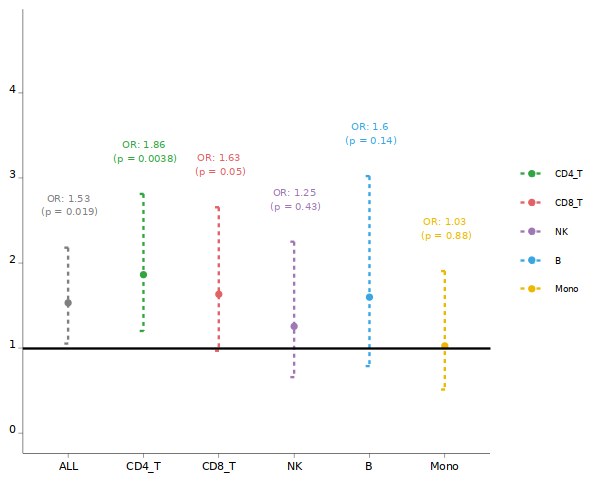

In [608]:
### Plot with only snp_based
# Create the plot
options(repr.plot.width = 5, repr.plot.height = 4)
or_plot = ggplot(odds_ratio_plot[odds_ratio_plot$type == 'snp_based',], aes(x = cell_type, y = estimate, color = cell_type, linetype = 'dashed' )) +
  geom_point(size = 1, position = position_dodge(width = 1)) +  cell_type_color +   geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2, position = position_dodge(width = 1))  +                           # Plot points
  geom_errorbar(aes(ymin = conf_lower, 
                    ymax = conf_upper), position = position_dodge(width = 1), 
                width = 0.1, size = 0.5, linetype = 'dashed') +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_plot$conf_upper)+0.5) + plot_config + theme(axis.title.y = element_blank(), axis.title.x = element_blank())

or_plot

pdf(paste0('figures/G2/G2_OR_Plot_snp', use_gwas, remove_HLA, only_dt, only_esnps, coloc_thres,use_gwas , cs_snps,  '.pdf'), width =3, height =2)
or_plot
dev.off()

In [609]:
### Plot with only ALL for eGene based approach

In [610]:
odds_ratio_plot = odds_ratio_plot[( odds_ratio_plot$type == 'snp_based') | ((odds_ratio_plot$type == 'eGene_based') & (odds_ratio_plot$cell_type == 'ALL')),]

In [611]:
odds_ratio_plot

,p_value,estimate,conf_upper,conf_lower,cell_type,type,excluded_genes_without_cs,trait_filter
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<lgl>,<chr>
6,0.0006863434,1.939638,2.784903,1.3238773,ALL,eGene_based,FALSE,disease
7,0.0187006300,1.531563,2.180496,1.0527763,ALL,snp_based,FALSE,disease
8,0.1422117000,1.598469,3.021836,0.7877197,B,snp_based,FALSE,disease
9,0.0037729260,1.862487,2.812239,1.2007029,CD4_T,snp_based,FALSE,disease
10,0.0496152300,1.632734,2.655485,0.9681380,CD8_T,snp_based,FALSE,disease
11,0.8767768000,1.025278,1.905349,0.5121500,Mono,snp_based,FALSE,disease
12,0.4340997000,1.254892,2.250417,0.6577192,NK,snp_based,FALSE,disease


pdf 
  2

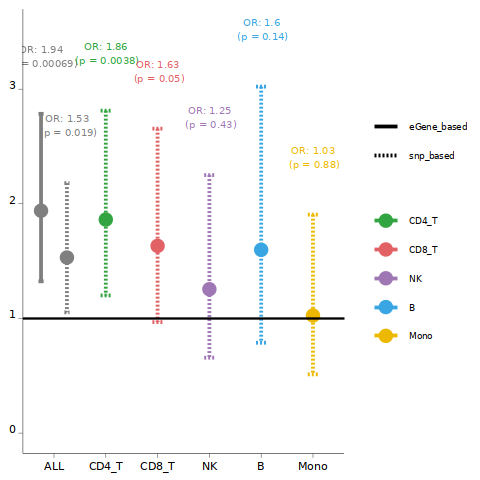

In [612]:
# Create the plot
options(repr.plot.width = 4, repr.plot.height = 4)
or_plot = ggplot(odds_ratio_plot, aes(x = cell_type, y = estimate, color = cell_type, linetype = type )) +
  geom_point(size = 3, position = position_dodge(width = 1)) +  cell_type_color +   geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2, position = position_dodge(width = 1))  +                           # Plot points
  geom_errorbar(aes(ymin = conf_lower, 
                    ymax = conf_upper), position = position_dodge(width = 1), 
                width = 0.2, size = 0.8) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_plot$conf_upper)+0.5) + plot_config + theme(axis.title.y = element_blank(), axis.title.x = element_blank())

or_plot

pdf(paste0('figures/G2/G2_OR_Plot_combined_reduced', use_gwas, remove_HLA, only_dt, only_esnps, coloc_thres,use_gwas , cs_snps,  '.pdf'), width =4.5, height =3)
or_plot
dev.off()

In [613]:
odds_ratio_plot

,p_value,estimate,conf_upper,conf_lower,cell_type,type,excluded_genes_without_cs,trait_filter
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<lgl>,<chr>
6,0.0006863434,1.939638,2.784903,1.3238773,ALL,eGene_based,FALSE,disease
7,0.0187006300,1.531563,2.180496,1.0527763,ALL,snp_based,FALSE,disease
8,0.1422117000,1.598469,3.021836,0.7877197,B,snp_based,FALSE,disease
9,0.0037729260,1.862487,2.812239,1.2007029,CD4_T,snp_based,FALSE,disease
10,0.0496152300,1.632734,2.655485,0.9681380,CD8_T,snp_based,FALSE,disease
11,0.8767768000,1.025278,1.905349,0.5121500,Mono,snp_based,FALSE,disease
12,0.4340997000,1.254892,2.250417,0.6577192,NK,snp_based,FALSE,disease


In [316]:
rownames(odds_ratio_plot) = NULL
odds_ratio_plot$excluded_eGenes_without_credible_set = cs_snps

In [317]:
### Save with plot data for sharing

In [318]:
write.csv(odds_ratio_plot, paste0('figures/G2/G2_OR_Plot_reduced', use_gwas, remove_HLA, only_dt, only_esnps, coloc_thres,use_gwas , cs_snps ,'_data.csv'))